In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder='/content/drive/MyDrive/Colab Notebooks/B4/'

In [ ]:
photos,labels = list(),list()

In [ ]:
for file in listdir(folder):
  output=0.0
  if file.startswith('HoaHong'):
    output=1.0
  if file.startswith('HoaLy'):
    output=2.0
  if file.startswith('HoaSen'):
    output=3.0
  if file.startswith('HoaCuc'):
    output=4.0
  if file.startswith('HoaPhuDung'):
    output=5.0
  photo = load_img(folder+file,target_size=(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [ ]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/Colab Notebooks/photo_B4.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/label_B4.npy',labels)

In [ ]:
print(photos.shape)
print(labels.shape)

(230, 200, 200, 3)
(230,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.3, train_size=0.7)

In [ ]:
print(train_x.shape)
print(test_x.shape)

(161, 200, 200, 3)
(69, 200, 200, 3)


In [ ]:
train_x = train_x.astype('float32')
train_x = train_x/255

In [ ]:
test_x = test_x.astype('float32')
test_x = test_x/255

In [ ]:
from keras.utils import to_categorical #One_hot_key
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [ ]:
print(train_x.shape)
print(y_train.shape)

(161, 200, 200, 3)
(161, 6)


In [ ]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [ ]:
batch_size = 100
epochs = 10
classes = 6 #3 đầu ra thì lớp là 4 để biển diễn được lớp thứ 0

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))

In [ ]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                 

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [ ]:
train = model.fit(train_x,y_train,batch_size=15,epochs=200,verbose=1)
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/200
11/11 [==============================] - 2s 37ms/step - loss: 6.5451 - accuracy: 0.2919
Epoch 2/200
11/11 [==============================] - 0s 37ms/step - loss: 1.5973 - accuracy: 0.4658
Epoch 3/200
11/11 [==============================] - 0s 38ms/step - loss: 1.1357 - accuracy: 0.6335
Epoch 4/200
11/11 [==============================] - 0s 37ms/step - loss: 0.8359 - accuracy: 0.6894
Epoch 5/200
11/11 [==============================] - 0s 38ms/step - loss: 0.6026 - accuracy: 0.8261
Epoch 6/200
11/11 [==============================] - 0s 39ms/step - loss: 0.3836 - accuracy: 0.8758
Epoch 7/200
11/11 [==============================] - 0s 38ms/step - loss: 0.2243 - accuracy: 0.9379
Epoch 8/200
11/11 [==============================] - 0s 37ms/step - loss: 0.1434 - accuracy: 0.9627
Epoch 9/200
11/11 [==============================] - 0s 37ms/step - loss: 0.0793 - accuracy: 0.9876
Epoch 10/200
11/11 [==============================] - 0s 38ms/step - loss: 0.1289 - accuracy: 0.9752

3/3 [==============================] - 0s 19ms/step - loss: 8.7057 - accuracy: 0.5362
Accuracy: 0.5362318754196167
Loss: 8.705717086791992


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/B4.h5')

1/1 [==============================] - 0s 82ms/step
[3]
Hoa sen


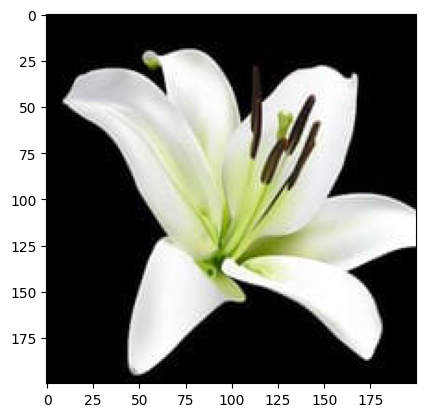

In [ ]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Colab Notebooks/Test4 (1).jpg',target_size=(200,200,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Hoa hồng")
if (a == 2):
  print("Hoa ly")
if (a == 3):
  print("Hoa sen")
if (a == 4):
  print("Hoa cúc")
if (a == 5):
  print("Hoa phù dung")

1/1 [==============================] - 0s 19ms/step
[5]
Hoa phù dung


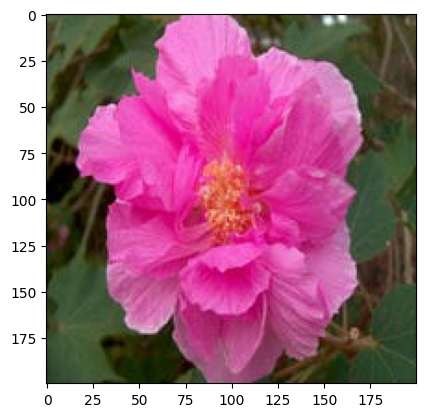

In [ ]:
img1 = load_img('/content/drive/MyDrive/Colab Notebooks/Test4 (2).jpg',target_size=(200,200,3))
plt.imshow(img1)
img1 = img_to_array(img1)
img1 = img1.reshape(1,200,200,3)
img1 = img1.astype('float32')
img1 = img1/255
a = np.argmax(model.predict(img1),axis=-1)
print(a)
if(a == 1):
  print("Hoa hồng")
if (a == 2):
  print("Hoa ly")
if (a == 3):
  print("Hoa sen")
if (a == 4):
  print("Hoa cúc")
if (a == 5):
  print("Hoa phù dung")

1/1 [==============================] - 0s 20ms/step
[2]
Hoa ly


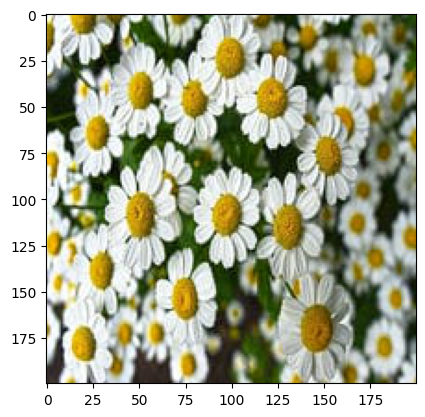

In [ ]:
img2 = load_img('/content/drive/MyDrive/Colab Notebooks/Test4 (3).jpg',target_size=(200,200,3))
plt.imshow(img2)
img2 = img_to_array(img2)
img2 = img2.reshape(1,200,200,3)
img2 = img2.astype('float32')
img2 = img2/255
a = np.argmax(model.predict(img2),axis=-1)
print(a)
if(a == 1):
  print("Hoa hồng")
if (a == 2):
  print("Hoa ly")
if (a == 3):
  print("Hoa sen")
if (a == 4):
  print("Hoa cúc")
if (a == 5):
  print("Hoa phù dung")

1/1 [==============================] - 0s 19ms/step
[1]
Hoa hồng


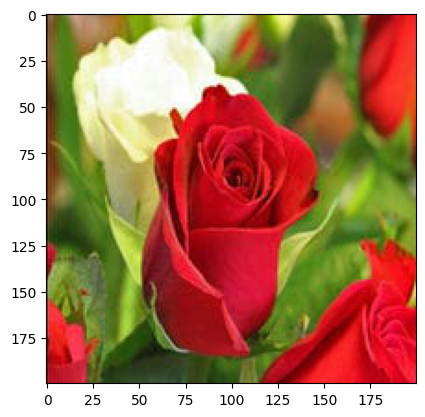

In [ ]:
img3 = load_img('/content/drive/MyDrive/Colab Notebooks/Test4 (5).jpg',target_size=(200,200,3))
plt.imshow(img3)
img3 = img_to_array(img3)
img3 = img3.reshape(1,200,200,3)
img3 = img3.astype('float32')
img3 = img3/255
a = np.argmax(model.predict(img3),axis=-1)
print(a)
if(a == 1):
  print("Hoa hồng")
if (a == 2):
  print("Hoa ly")
if (a == 3):
  print("Hoa sen")
if (a == 4):
  print("Hoa cúc")
if (a == 5):
  print("Hoa phù dung")

1/1 [==============================] - 0s 18ms/step
[2]
Hoa ly


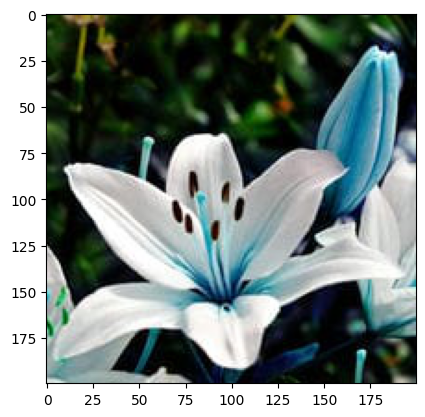

In [ ]:
img4 = load_img('/content/drive/MyDrive/Colab Notebooks/Test4 (6).jpg',target_size=(200,200,3))
plt.imshow(img4)
img4 = img_to_array(img4)
img4 = img4.reshape(1,200,200,3)
img4 = img4.astype('float32')
img4 = img4/255
a = np.argmax(model.predict(img4),axis=-1)
print(a)
if(a == 1):
  print("Hoa hồng")
if (a == 2):
  print("Hoa ly")
if (a == 3):
  print("Hoa sen")
if (a == 4):
  print("Hoa cúc")
if (a == 5):
  print("Hoa phù dung")